In [9]:
import numpy as np
import skimage.io as skio
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances

In [22]:
print("Loading and classifying 'Italy50.png'...")
img1 = skio.imread('Italy50.png')
rows, cols, _ = img1.shape
proxy = np.zeros(shape=(rows, cols), dtype=np.uint8)

for x in range(rows):
    for y in range(cols):
        pixel = img1[x, y]
        val = 0  
        if pixel[1] > pixel[2]:
            val = 1  
        elif pixel[2] > pixel[1]: 
            val = 2  
        proxy[x, y] = val

Loading and classifying 'Italy50.png'...


Preparing data using a 3x3 box...
Found 151487 training points.
Found 151487 blank pixels to predict.
Applying Optimized KNN with Euclidean distance (k=1)...
Euclidean prediction complete.
Applying Optimized KNN with Manhattan distance (k=1)...
Manhattan prediction complete.


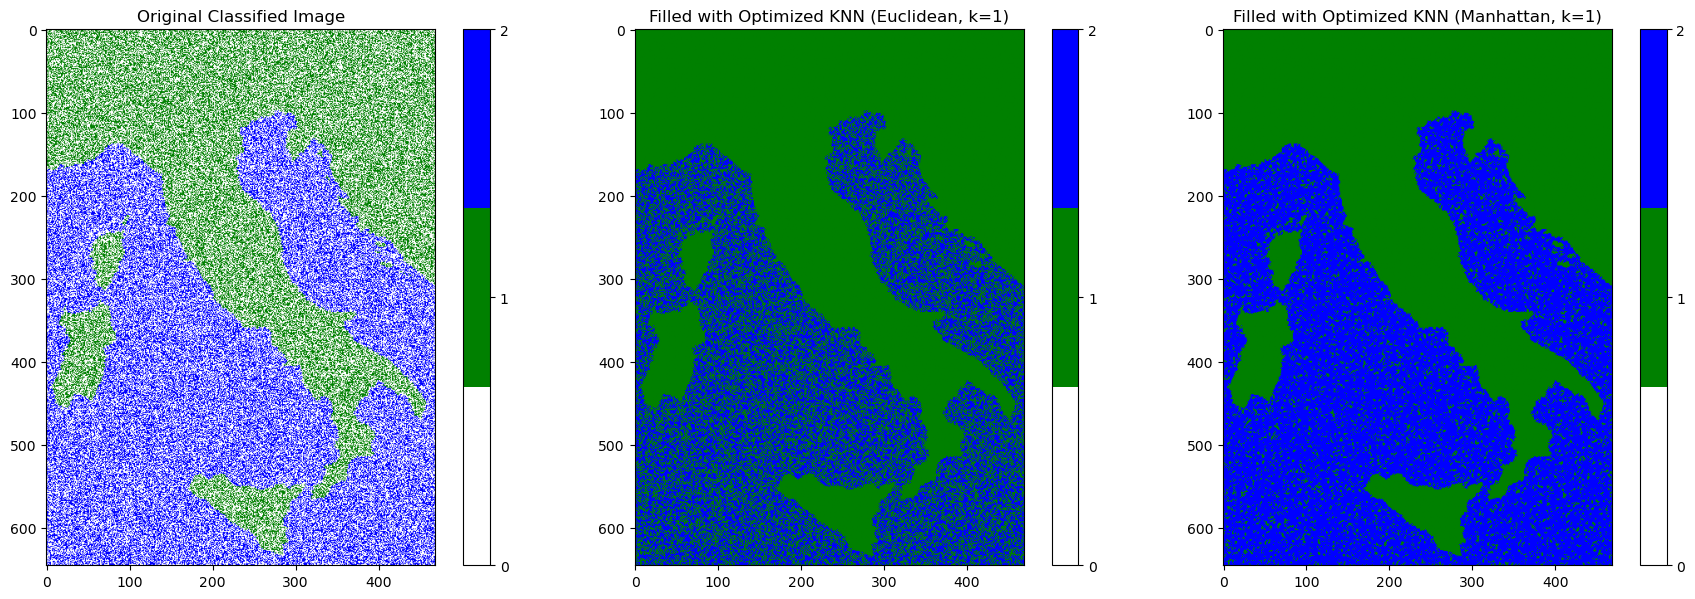

In [23]:
k=1
BOX_SIZE = 3     
print(f"Preparing data using a {BOX_SIZE}x{BOX_SIZE} box...")

pad_width = BOX_SIZE // 2
padded_proxy = np.pad(proxy, pad_width=pad_width, mode='reflect')

known_mask = proxy != 0
blank_mask = proxy == 0

X_train = []
for r, c in np.argwhere(known_mask):
    neighborhood = padded_proxy[r:r + BOX_SIZE, c:c + BOX_SIZE]
    X_train.append(neighborhood.flatten())

y_train = proxy[known_mask]

X_test = []
test_coords = np.argwhere(blank_mask) 
for r, c in test_coords:
    neighborhood = padded_proxy[r:r + BOX_SIZE, c:c + BOX_SIZE]
    X_test.append(neighborhood.flatten())

print(f"Found {len(X_train)} training points.")
print(f"Found {len(X_test)} blank pixels to predict.")

filled_proxy_euclidean = np.copy(proxy)
filled_proxy_manhattan = np.copy(proxy)

# --- Euclidean Distance ---
print(f"Applying Optimized KNN with Euclidean distance (k={k})...")
knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean', algorithm='auto', n_jobs=-1)
knn_euclidean.fit(X_train, y_train)
predicted_euclidean = knn_euclidean.predict(X_test)
for i, (r, c) in enumerate(test_coords):
    filled_proxy_euclidean[r, c] = predicted_euclidean[i]
print("Euclidean prediction complete.")

# --- Manhattan Distance ---
print(f"Applying Optimized KNN with Manhattan distance (k={k})...")
knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan', algorithm='auto', n_jobs=-1)
knn_manhattan.fit(X_train, y_train)
predicted_manhattan = knn_manhattan.predict(X_test)
for i, (r, c) in enumerate(test_coords):
    filled_proxy_manhattan[r, c] = predicted_manhattan[i]
print("Manhattan prediction complete.")

custom_cmap = ListedColormap(['white', 'green', 'blue']) 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

im0 = axes[0].imshow(proxy, cmap=custom_cmap, vmin=0, vmax=2)
axes[0].set_title('Original Classified Image')
fig.colorbar(im0, ax=axes[0], ticks=[0, 1, 2]) 

im1 = axes[1].imshow(filled_proxy_euclidean, cmap=custom_cmap, vmin=0, vmax=2)
axes[1].set_title(f'Filled with Optimized KNN (Euclidean, k={k})')
fig.colorbar(im1, ax=axes[1], ticks=[0, 1, 2])

im2 = axes[2].imshow(filled_proxy_manhattan, cmap=custom_cmap, vmin=0, vmax=2)
axes[2].set_title(f'Filled with Optimized KNN (Manhattan, k={k})')
fig.colorbar(im2, ax=axes[2], ticks=[0, 1, 2])
plt.tight_layout() 
plt.show()

Preparing data using a 3x3 box...
Found 151487 training points.
Found 151487 blank pixels to predict.
Applying Optimized KNN with Euclidean distance (k=3)...
Euclidean prediction complete.
Applying Optimized KNN with Manhattan distance (k=3)...
Manhattan prediction complete.


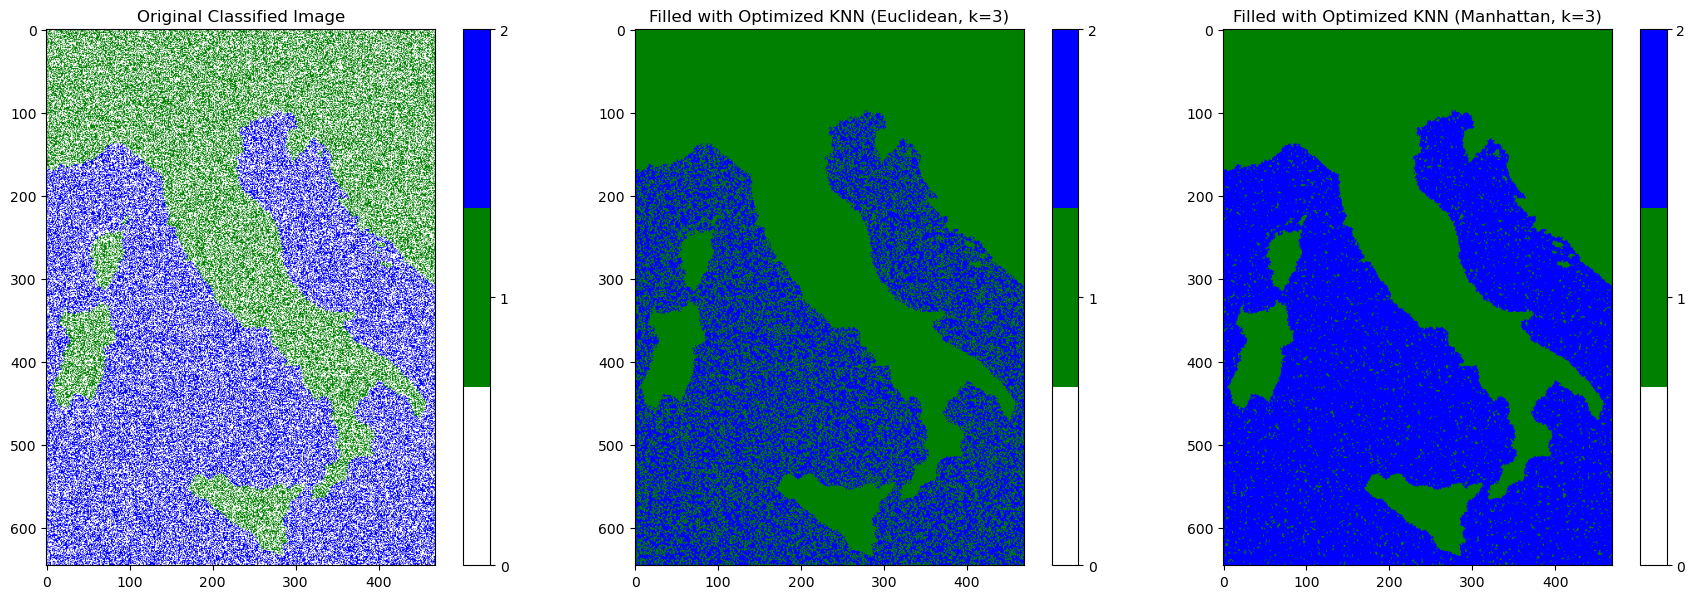

In [24]:
k=3
BOX_SIZE = 3   
print(f"Preparing data using a {BOX_SIZE}x{BOX_SIZE} box...")

pad_width = BOX_SIZE // 2
padded_proxy = np.pad(proxy, pad_width=pad_width, mode='reflect')

known_mask = proxy != 0
blank_mask = proxy == 0

X_train = []
for r, c in np.argwhere(known_mask):
    neighborhood = padded_proxy[r:r + BOX_SIZE, c:c + BOX_SIZE]
    X_train.append(neighborhood.flatten())

y_train = proxy[known_mask]

X_test = []
test_coords = np.argwhere(blank_mask) 
for r, c in test_coords:
    neighborhood = padded_proxy[r:r + BOX_SIZE, c:c + BOX_SIZE]
    X_test.append(neighborhood.flatten())

print(f"Found {len(X_train)} training points.")
print(f"Found {len(X_test)} blank pixels to predict.")

filled_proxy_euclidean = np.copy(proxy)
filled_proxy_manhattan = np.copy(proxy)

# --- Euclidean Distance ---
print(f"Applying Optimized KNN with Euclidean distance (k={k})...")
knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean', algorithm='auto', n_jobs=-1)
knn_euclidean.fit(X_train, y_train)
predicted_euclidean = knn_euclidean.predict(X_test)
for i, (r, c) in enumerate(test_coords):
    filled_proxy_euclidean[r, c] = predicted_euclidean[i]
print("Euclidean prediction complete.")

# --- Manhattan Distance ---
print(f"Applying Optimized KNN with Manhattan distance (k={k})...")
knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan', algorithm='auto', n_jobs=-1)
knn_manhattan.fit(X_train, y_train)
predicted_manhattan = knn_manhattan.predict(X_test)
for i, (r, c) in enumerate(test_coords):
    filled_proxy_manhattan[r, c] = predicted_manhattan[i]
print("Manhattan prediction complete.")

custom_cmap = ListedColormap(['white', 'green', 'blue']) 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

im0 = axes[0].imshow(proxy, cmap=custom_cmap, vmin=0, vmax=2)
axes[0].set_title('Original Classified Image')
fig.colorbar(im0, ax=axes[0], ticks=[0, 1, 2]) 

im1 = axes[1].imshow(filled_proxy_euclidean, cmap=custom_cmap, vmin=0, vmax=2)
axes[1].set_title(f'Filled with Optimized KNN (Euclidean, k={k})')
fig.colorbar(im1, ax=axes[1], ticks=[0, 1, 2])

im2 = axes[2].imshow(filled_proxy_manhattan, cmap=custom_cmap, vmin=0, vmax=2)
axes[2].set_title(f'Filled with Optimized KNN (Manhattan, k={k})')
fig.colorbar(im2, ax=axes[2], ticks=[0, 1, 2])
plt.tight_layout() 
plt.show()

Preparing data using a 3x3 box...
Found 151487 training points.
Found 151487 blank pixels to predict.
Applying Optimized KNN with Euclidean distance (k=5)...
Euclidean prediction complete.
Applying Optimized KNN with Manhattan distance (k=5)...
Manhattan prediction complete.


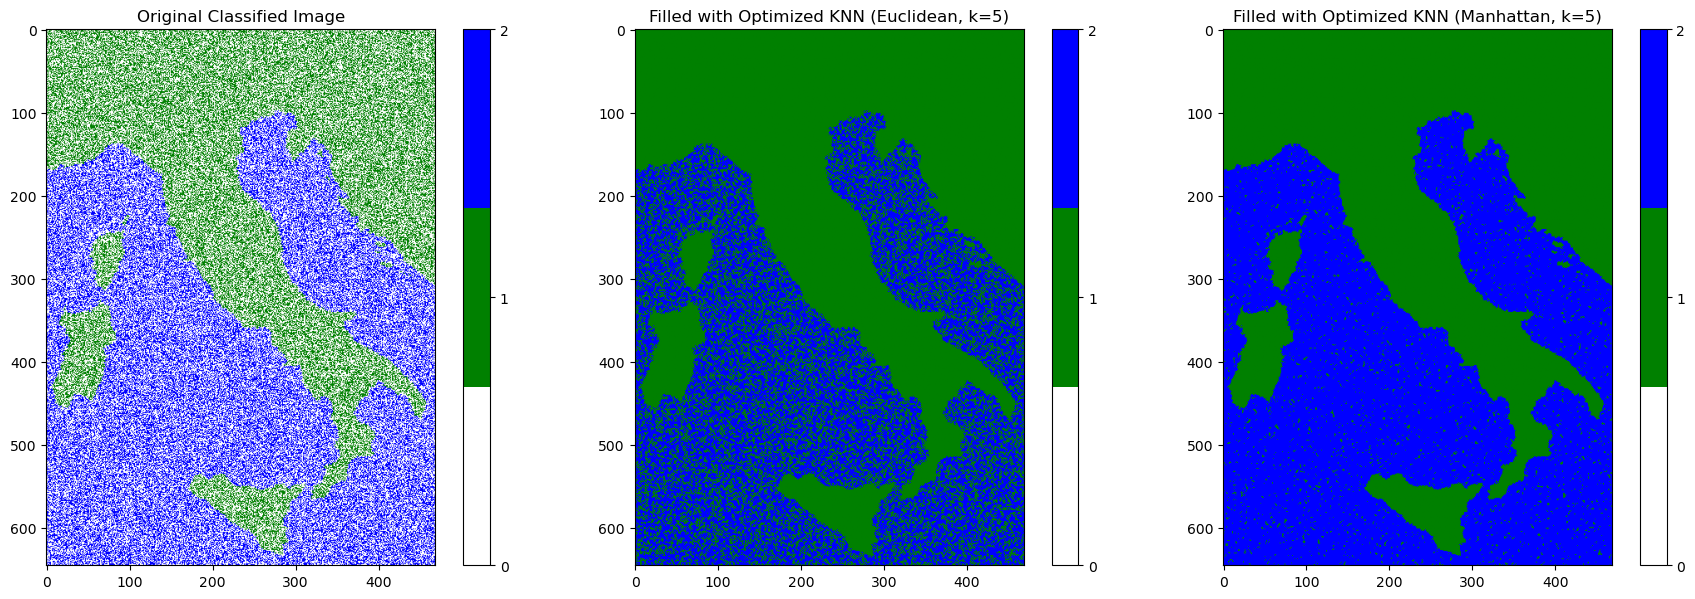

In [25]:
k=5
BOX_SIZE = 3  
print(f"Preparing data using a {BOX_SIZE}x{BOX_SIZE} box...")

pad_width = BOX_SIZE // 2
padded_proxy = np.pad(proxy, pad_width=pad_width, mode='reflect')

known_mask = proxy != 0
blank_mask = proxy == 0

X_train = []
for r, c in np.argwhere(known_mask):
    neighborhood = padded_proxy[r:r + BOX_SIZE, c:c + BOX_SIZE]
    X_train.append(neighborhood.flatten())

y_train = proxy[known_mask]

X_test = []
test_coords = np.argwhere(blank_mask) 
for r, c in test_coords:
    neighborhood = padded_proxy[r:r + BOX_SIZE, c:c + BOX_SIZE]
    X_test.append(neighborhood.flatten())

print(f"Found {len(X_train)} training points.")
print(f"Found {len(X_test)} blank pixels to predict.")

filled_proxy_euclidean = np.copy(proxy)
filled_proxy_manhattan = np.copy(proxy)

# --- Euclidean Distance ---
print(f"Applying Optimized KNN with Euclidean distance (k={k})...")
knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean', algorithm='auto', n_jobs=-1)
knn_euclidean.fit(X_train, y_train)
predicted_euclidean = knn_euclidean.predict(X_test)
for i, (r, c) in enumerate(test_coords):
    filled_proxy_euclidean[r, c] = predicted_euclidean[i]
print("Euclidean prediction complete.")

# --- Manhattan Distance ---
print(f"Applying Optimized KNN with Manhattan distance (k={k})...")
knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan', algorithm='auto', n_jobs=-1)
knn_manhattan.fit(X_train, y_train)
predicted_manhattan = knn_manhattan.predict(X_test)
for i, (r, c) in enumerate(test_coords):
    filled_proxy_manhattan[r, c] = predicted_manhattan[i]
print("Manhattan prediction complete.")

custom_cmap = ListedColormap(['white', 'green', 'blue']) 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

im0 = axes[0].imshow(proxy, cmap=custom_cmap, vmin=0, vmax=2)
axes[0].set_title('Original Classified Image')
fig.colorbar(im0, ax=axes[0], ticks=[0, 1, 2]) 

im1 = axes[1].imshow(filled_proxy_euclidean, cmap=custom_cmap, vmin=0, vmax=2)
axes[1].set_title(f'Filled with Optimized KNN (Euclidean, k={k})')
fig.colorbar(im1, ax=axes[1], ticks=[0, 1, 2])

im2 = axes[2].imshow(filled_proxy_manhattan, cmap=custom_cmap, vmin=0, vmax=2)
axes[2].set_title(f'Filled with Optimized KNN (Manhattan, k={k})')
fig.colorbar(im2, ax=axes[2], ticks=[0, 1, 2])
plt.tight_layout() 
plt.show()

Preparing data using a 3x3 box...
Found 151487 training points.
Found 151487 blank pixels to predict.
Applying Optimized KNN with Euclidean distance (k=7)...
Euclidean prediction complete.
Applying Optimized KNN with Manhattan distance (k=7)...
Manhattan prediction complete.


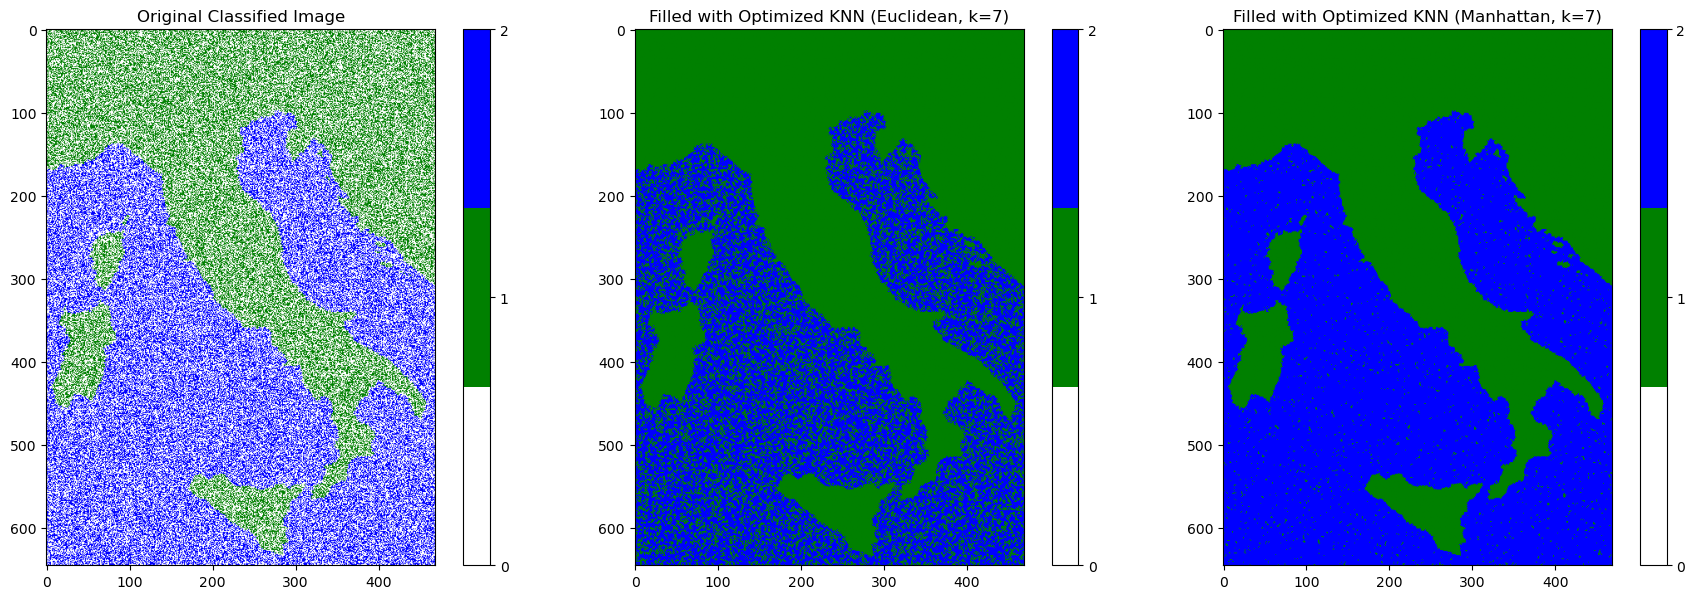

In [26]:
k=7
BOX_SIZE = 3
print(f"Preparing data using a {BOX_SIZE}x{BOX_SIZE} box...")

pad_width = BOX_SIZE // 2
padded_proxy = np.pad(proxy, pad_width=pad_width, mode='reflect')

known_mask = proxy != 0
blank_mask = proxy == 0

X_train = []
for r, c in np.argwhere(known_mask):
    neighborhood = padded_proxy[r:r + BOX_SIZE, c:c + BOX_SIZE]
    X_train.append(neighborhood.flatten())

y_train = proxy[known_mask]

X_test = []
test_coords = np.argwhere(blank_mask) 
for r, c in test_coords:
    neighborhood = padded_proxy[r:r + BOX_SIZE, c:c + BOX_SIZE]
    X_test.append(neighborhood.flatten())

print(f"Found {len(X_train)} training points.")
print(f"Found {len(X_test)} blank pixels to predict.")

filled_proxy_euclidean = np.copy(proxy)
filled_proxy_manhattan = np.copy(proxy)

# --- Euclidean Distance ---
print(f"Applying Optimized KNN with Euclidean distance (k={k})...")
knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean', algorithm='auto', n_jobs=-1)
knn_euclidean.fit(X_train, y_train)
predicted_euclidean = knn_euclidean.predict(X_test)
for i, (r, c) in enumerate(test_coords):
    filled_proxy_euclidean[r, c] = predicted_euclidean[i]
print("Euclidean prediction complete.")

# --- Manhattan Distance ---
print(f"Applying Optimized KNN with Manhattan distance (k={k})...")
knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan', algorithm='auto', n_jobs=-1)
knn_manhattan.fit(X_train, y_train)
predicted_manhattan = knn_manhattan.predict(X_test)
for i, (r, c) in enumerate(test_coords):
    filled_proxy_manhattan[r, c] = predicted_manhattan[i]
print("Manhattan prediction complete.")

custom_cmap = ListedColormap(['white', 'green', 'blue']) 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

im0 = axes[0].imshow(proxy, cmap=custom_cmap, vmin=0, vmax=2)
axes[0].set_title('Original Classified Image')
fig.colorbar(im0, ax=axes[0], ticks=[0, 1, 2]) 

im1 = axes[1].imshow(filled_proxy_euclidean, cmap=custom_cmap, vmin=0, vmax=2)
axes[1].set_title(f'Filled with Optimized KNN (Euclidean, k={k})')
fig.colorbar(im1, ax=axes[1], ticks=[0, 1, 2])

im2 = axes[2].imshow(filled_proxy_manhattan, cmap=custom_cmap, vmin=0, vmax=2)
axes[2].set_title(f'Filled with Optimized KNN (Manhattan, k={k})')
fig.colorbar(im2, ax=axes[2], ticks=[0, 1, 2])
plt.tight_layout() 
plt.show()

Preparing data using a 3x3 box...
Found 151487 training points.
Found 151487 blank pixels to predict.
Applying Optimized KNN with Euclidean distance (k=9)...
Euclidean prediction complete.
Applying Optimized KNN with Manhattan distance (k=9)...
Manhattan prediction complete.


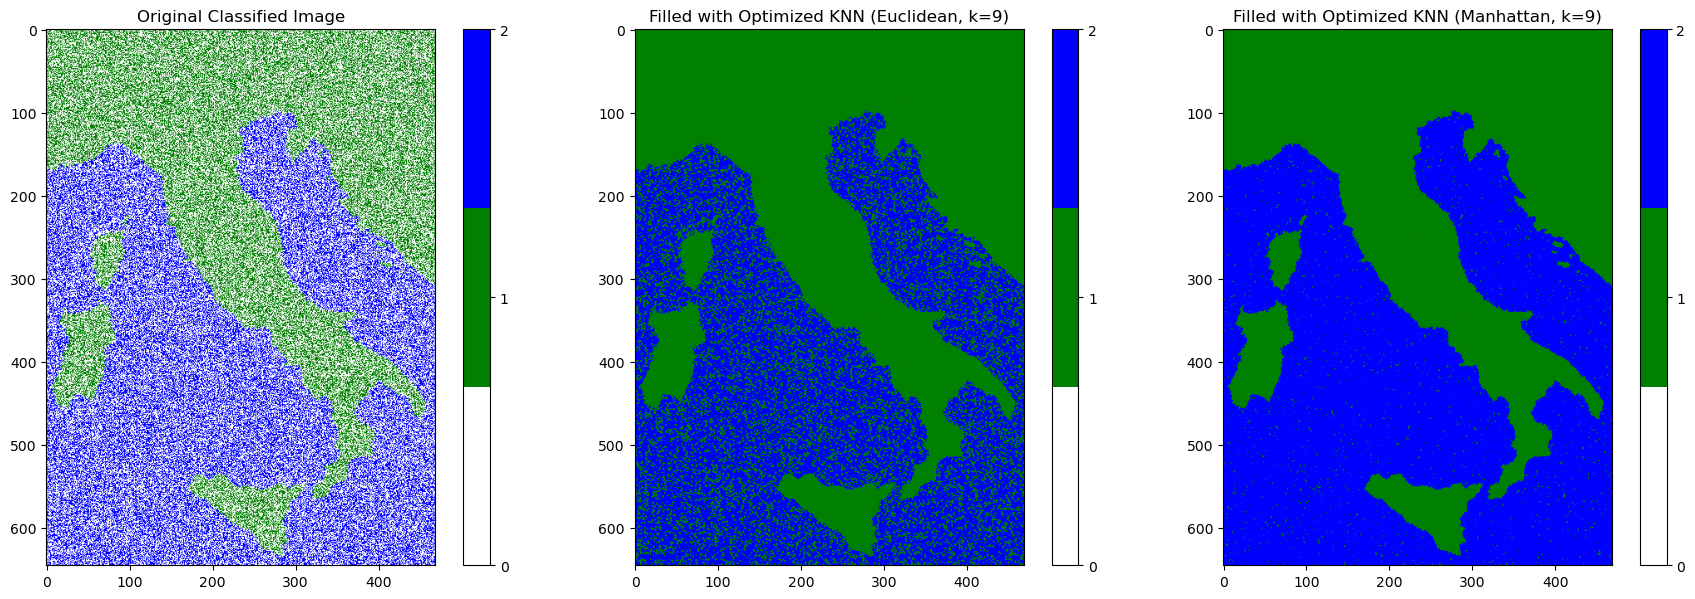

In [27]:
k=9
BOX_SIZE = 3 
print(f"Preparing data using a {BOX_SIZE}x{BOX_SIZE} box...")

pad_width = BOX_SIZE // 2
padded_proxy = np.pad(proxy, pad_width=pad_width, mode='reflect')

known_mask = proxy != 0
blank_mask = proxy == 0

X_train = []
for r, c in np.argwhere(known_mask):
    neighborhood = padded_proxy[r:r + BOX_SIZE, c:c + BOX_SIZE]
    X_train.append(neighborhood.flatten())

y_train = proxy[known_mask]

X_test = []
test_coords = np.argwhere(blank_mask) 
for r, c in test_coords:
    neighborhood = padded_proxy[r:r + BOX_SIZE, c:c + BOX_SIZE]
    X_test.append(neighborhood.flatten())

print(f"Found {len(X_train)} training points.")
print(f"Found {len(X_test)} blank pixels to predict.")

filled_proxy_euclidean = np.copy(proxy)
filled_proxy_manhattan = np.copy(proxy)

# --- Euclidean Distance ---
print(f"Applying Optimized KNN with Euclidean distance (k={k})...")
knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean', algorithm='auto', n_jobs=-1)
knn_euclidean.fit(X_train, y_train)
predicted_euclidean = knn_euclidean.predict(X_test)
for i, (r, c) in enumerate(test_coords):
    filled_proxy_euclidean[r, c] = predicted_euclidean[i]
print("Euclidean prediction complete.")

# --- Manhattan Distance ---
print(f"Applying Optimized KNN with Manhattan distance (k={k})...")
knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan', algorithm='auto', n_jobs=-1)
knn_manhattan.fit(X_train, y_train)
predicted_manhattan = knn_manhattan.predict(X_test)
for i, (r, c) in enumerate(test_coords):
    filled_proxy_manhattan[r, c] = predicted_manhattan[i]
print("Manhattan prediction complete.")

custom_cmap = ListedColormap(['white', 'green', 'blue']) 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

im0 = axes[0].imshow(proxy, cmap=custom_cmap, vmin=0, vmax=2)
axes[0].set_title('Original Classified Image')
fig.colorbar(im0, ax=axes[0], ticks=[0, 1, 2]) 

im1 = axes[1].imshow(filled_proxy_euclidean, cmap=custom_cmap, vmin=0, vmax=2)
axes[1].set_title(f'Filled with Optimized KNN (Euclidean, k={k})')
fig.colorbar(im1, ax=axes[1], ticks=[0, 1, 2])

im2 = axes[2].imshow(filled_proxy_manhattan, cmap=custom_cmap, vmin=0, vmax=2)
axes[2].set_title(f'Filled with Optimized KNN (Manhattan, k={k})')
fig.colorbar(im2, ax=axes[2], ticks=[0, 1, 2])
plt.tight_layout() 
plt.show()